<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Nature_Inspired_Computing_Labs/blob/main/ACO_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[//]:# (based on  https://scikit-opt.github.io/scikit-opt/#/en/README?id=_5-aca-ant-colony-algorithm-for-tsp)

# ACO

Pheromone update:

![Delta tau](https://wikimedia.org/api/rest_v1/media/math/render/svg/da75f512c94f2b2737112bebbf97539f5f6928c0)

![Tau update](https://wikimedia.org/api/rest_v1/media/math/render/svg/62ef8b59ad37970b4e693ee923b6d7db8bbd5c30)

Transition probability:

![P(x->y)](https://wikimedia.org/api/rest_v1/media/math/render/svg/a55af3e02c1e319b5b8be2c626e6cf851e8078f9)

Applications:
- https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms#Applications
- https://www.math.md/files/csjm/v23-n3/v23-n3-(pp343-359).pdf

---
TSP, again...

In [2]:
!pip install scikit-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
from sko.ACA import ACA_TSP
import matplotlib
#matplotlib.use("TkAgg")

In [6]:
# Based on: https://github.com/rochakgupta/aco-tsp/blob/master/aco_tsp.py
num_points = 30

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=num_points, max_iter=100,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()
print(f'{best_x = }, {best_y = }')

best_x = array([ 0, 27, 20, 13,  1, 24,  2, 25, 17,  6, 11, 28, 16, 21,  5, 14, 23,
       18,  8, 12,  4, 29, 15, 19,  3,  9, 22, 10, 26,  7]), best_y = 4.67074306478294


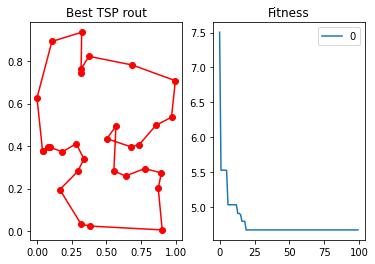

In [7]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[0].set_title('Best TSP rout')

pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
ax[1].set_title('Fitness')
plt.show()

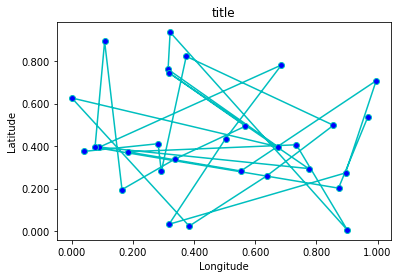

In [8]:
best_x_history, best_y_history = aca.x_best_history, aca.y_best_history

indexes = np.array(best_y_history).argsort()
best_x_history = np.array(best_x_history)[indexes]

fig2, ax2 = plt.subplots(1, 1)
ax2.set_title('title', loc='center')
line = ax2.plot(points_coordinate[:, 0], points_coordinate[:, 1],
                marker='o', markerfacecolor='b', color='c', linestyle='-')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
plt.ion()
p = plt.show()


def update_scatter(frame):
    if frame == len(best_x_history):
        ax2.set_title('Best TSP route')
        best_points_ = np.concatenate([best_x, [best_x[0]]])
        best_points_coordinate = points_coordinate[best_points_, :]
        plt.setp(line, 'xdata', best_points_coordinate[:, 0], 'ydata', best_points_coordinate[:, 1])
        return line
    ax2.set_title('iter = ' + str(frame))
    points = best_x_history[frame]
    points = np.concatenate([points, [points[0]]])
    point_coordinate = points_coordinate[points, :]
    plt.setp(line, 'xdata', point_coordinate[:, 0], 'ydata', point_coordinate[:, 1])

    return line


ani = FuncAnimation(
    fig2,
    update_scatter,
    blit=False,
    repeat=False,
    interval=50,
    frames=len(best_x_history) + 1
)

plt.show()

# [ABC](https://abc.erciyes.edu.tr/)

> - An Initialisation Phase where an initial population of bees is created to cover the entire search space as much
 > as possible by uniformly randomizing the solution vector of individuals,
> - An Exploitation Phase where new candidate solutions are generated for each employed bee using a cross-over and
 > mutation operator. If the modified solution vector of a mutant bee is better than that of the original one, the new
 > vector is assigned to the employed bee,
> - A Refinement Phase during which onlooker bees attempt to locally improve the solution vectors of the employed bee
 > they have decided to follow after the waggle dance phase. If they improve it, they will communicate their findings to the bee they initially watched waggle dancing,
> - An Exploration Phase where scout bees are sent out to un-explored regions of the search domain.
>
> https://rwuilbercq.github.io/Hive/

Rosenbrock_function:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/64863353dcdea2f0ed049cec3aea0a4284d4916a)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/53f008f82897059e3591d0a9a0aa27b60a1745b4)

![Rosenbrock_function](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Rosenbrock_contour.svg/300px-Rosenbrock_contour.svg.png)

In [10]:
!pip install beecolpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for beecolpy: filename=beecolpy-2.3.2-py3-none-any.whl size=17981 sha256=7752f03a918f5261b021a85aa048ae27b7fd0ac95f8e1e074526f72d06a7f757
  Stored in directory: /root/.cache/pip/wheels/3c/e9/c4/304fcab08001387bde5ec95aeeb4ae855b25b5e0c64a3a8720
Successfully built beecolpy


In [15]:
# based on https://github.com/renard162/BeeColPy
"""
To find the minimum  of sphere function on interval (-10 to 10) with
2 dimensions in domain using default parameters:
"""

from beecolpy import abc

def rosenbrock_function(position):
    value = [
        100 * (position[i+1] - position[i]**2)**2 +
        (1-position[i])**2
        for i in range(len(position)-1)
     ]
    return sum(value)

# configure you ABC. Try different dimensions for the problem
abc_obj = abc(function = rosenbrock_function,
              boundaries = [(-10,10), (-10,10)],
              colony_size=40,
              scouts=0.5,
              iterations=50,
              min_max='min',
              nan_protection=True,
              log_agents=True)

abc_obj.fit() #Execute the algorithm

#If you want to get the obtained solution after execute the fit() method:
solution = abc_obj.get_solution()

#If you want to get the number of iterations executed, number of times that
#scout event occur and number of times that NaN protection actuated:
iterations = abc_obj.get_status()[0]
scout = abc_obj.get_status()[1]
nan_events = abc_obj.get_status()[2]

#If you want to get a list with position of all points (food sources) used in each iteration:
food_sources = abc_obj.get_agents()

print('solution', solution)
print('Error', rosenbrock_function(solution))

solution [1.0704730487124814, 1.149976025792808]
Error 0.00661763575600927
